##  Google Play Store- workshop
---

1. Number of app in each category
---
2. Average ratings for each category
---
3. Find the category with the highest rating
---
4. Find the category with the highest avg rating
---
5. Plot the ratings in the following ranges 
    - 5 to 4.5, 
    - 4.5 to 3.5, 
    - 3.5 to 2.5, 
    - 2.5 and below (edited) 
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv') #"https://chukmunnlee.github.io/dataset/googleplaystore.csv")

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [16]:
#save those records before dropping
df[df.isna().values].to_csv("dropped-records.csv")

In [10]:
df.shape

(10841, 13)

In [8]:
## clean the Rating colum
df["Rating"]= df.Rating.fillna(0)

In [17]:
## Drop all other nan values
# Drop all the nan rows...
df.dropna(inplace=True)

In [19]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null object
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [20]:
df.to_csv("appstore-data-cleaned.csv", index=False)

In [23]:
subset_col = ["App","Category","Rating","Reviews"]
subset  = df.loc[:, subset_col].copy()
subset.head()

,App,Category,Rating,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967


In [28]:
def count_without_duplicates(s):
    return len(s.unique())

res_series1 = subset.groupby("Category")['App'].apply(count_without_duplicates)

In [29]:
# Total No of Apps in each category
res_series2 = subset.groupby("Category")['App'].count()

In [36]:
final_res = pd.DataFrame([res_series1,res_series2]).T
final_res.columns = ['no_duplicates','with_duplictes']

In [40]:
final_res["diff"]= final_res.with_duplictes - final_res.no_duplicates

In [45]:
final_res[final_res['diff'] > 0]

,no_duplicates,with_duplictes,diff
Category,,,
ART_AND_DESIGN,63,64,1
BOOKS_AND_REFERENCE,221,230,9
BUSINESS,420,460,40
COMICS,56,60,4
COMMUNICATION,316,387,71
DATING,171,234,63
EDUCATION,119,156,37
ENTERTAINMENT,102,149,47
FAMILY,1905,1968,63


In [58]:
def func(series):
    if series['diff'] == 0:
        #return ['background-color: yellow' for i in range(3)]
        return ['background-color: yellow' for i in range(len(series))]
    else:
        return ['background-color: ""' for i in range(len(series))]
    
final_res.style.apply(func, axis=1)

,no_duplicates,with_duplictes,diff
Category,,,
ART_AND_DESIGN,63,64,1
AUTO_AND_VEHICLES,85,85,0
BEAUTY,53,53,0
BOOKS_AND_REFERENCE,221,230,9
BUSINESS,420,460,40
COMICS,56,60,4
COMMUNICATION,316,387,71
DATING,171,234,63
EDUCATION,119,156,37


In [60]:
# final_res

In [61]:
def func(series):
    if series.name == "diff":
        #return ['background-color: yellow' for i in range(3)]
        return ['background-color: yellow' for i in range(len(series))]
    else:
        return ['background-color: ""' for i in range(len(series))]
    
final_res.style.apply(func, axis=0)

,no_duplicates,with_duplictes,diff
Category,,,
ART_AND_DESIGN,63,64,1
AUTO_AND_VEHICLES,85,85,0
BEAUTY,53,53,0
BOOKS_AND_REFERENCE,221,230,9
BUSINESS,420,460,40
COMICS,56,60,4
COMMUNICATION,316,387,71
DATING,171,234,63
EDUCATION,119,156,37


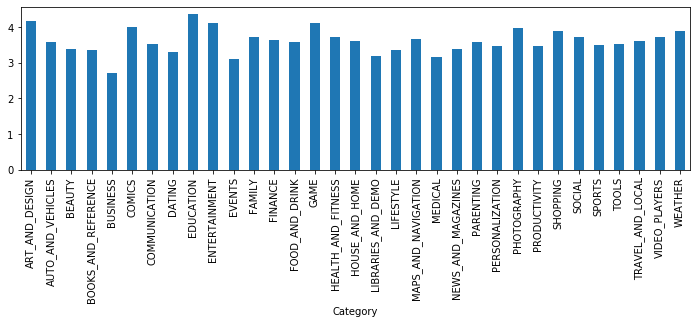

In [69]:
#Avg app rating for each category
res = subset.groupby("Category")['Rating'].mean()
res.plot("bar",figsize=(12,3))

## Cleaning tips

In [50]:
# df[df.Category == "1.9"]

In [47]:
# Drop na
# df.dropna(inplace=True)

In [74]:
#Find category with the highest avg rating
avg_rat = subset.groupby("Category")['Rating'].mean()
avg_rat.idxmax()

'EDUCATION'

In [77]:
avg_rat[avg_rat==avg_rat.max()]

Category
EDUCATION    4.360897
Name: Rating, dtype: float64

Plot the ratings in the following ranges
- 5 to 4.5,
- 4.5 to 3.5,
- 3.5 to 2.5,
- 2.5 and below (edited)

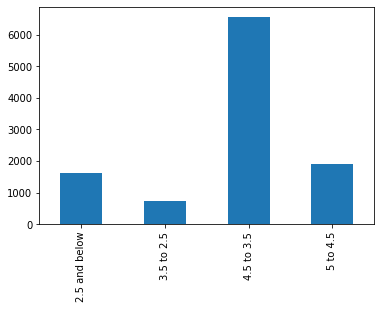

In [86]:
def to_rating_category(x):
    if x>4.5 and x<=5.:
        return "5 to 4.5"
    elif x>3.5 :
        return "4.5 to 3.5"
    elif x>2.5:
        return "3.5 to 2.5"
    else:
        return "2.5 and below"
subset.Rating.apply(to_rating_category).value_counts().sort_index().plot("bar")

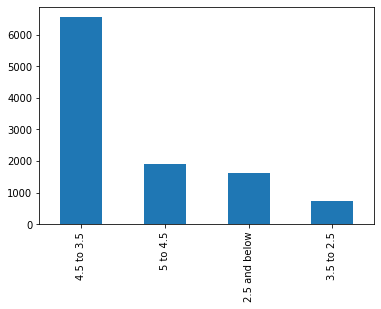

In [89]:
subset.Rating.apply(to_rating_category).value_counts().sort_values(ascending=False).plot("bar")

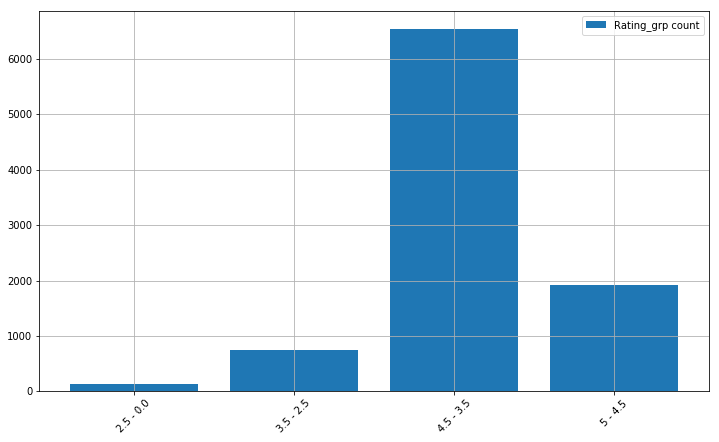

In [70]:
#code 


In [11]:
## Optional 2
## Plot the distrubution of `app Installs` as a bar chart...
# df.Installs.unique()

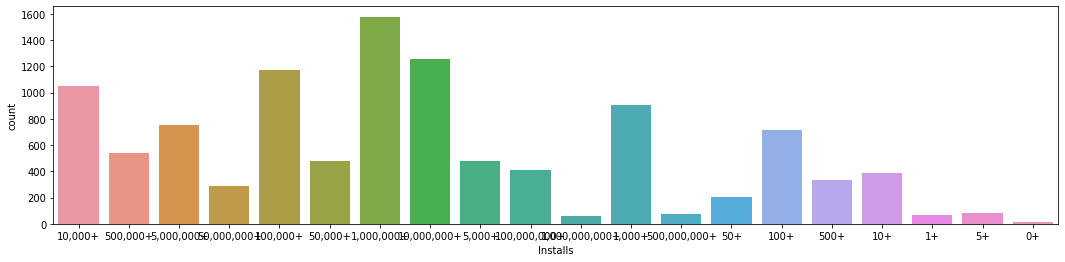

In [96]:
import seaborn as sns
plt.figure(figsize=(18,4))
sns.countplot(df.Installs)

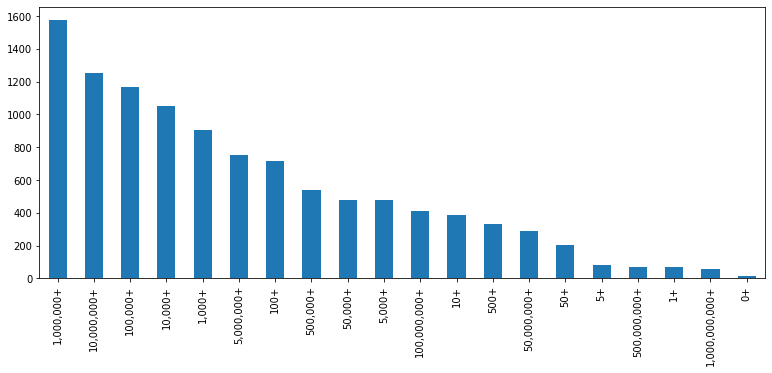

In [102]:
df.Installs.value_counts().plot("bar", figsize=(13,5))

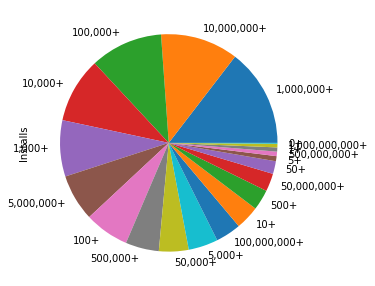

In [103]:
df.Installs.value_counts().plot("pie", figsize=(13,5))

In [12]:
## Optional 1
#1. Find out the Top 10 Apps (based on App size)
#Checkout the Size column for more info.
# You will have to clean the data "6.5M", "10K" to a single value and sort them.
# M: Mb 
# K: Kb
# df['Size'].unique()

In [ ]:
1b
1024 1KB
1024*1024 = 1M

In [111]:
def clean_the_size_column(x):
    x = str(x)
    if x == 'Varies with device':
        return 0
    elif x.endswith("M"):
        return  float(x.replace("M",''))*1000
    elif x.endswith("K") or x.endswith("k"):
        return float(x.replace("K",'').replace("k",''))
    else:
        return -1
    
df['Size_cleaned'] = df.Size.apply(clean_the_size_column)

# df.Size.unique()

In [121]:
df.sort_values(['Size_cleaned'],ascending=False).loc[:, ['App','Size','Category']].drop_duplicates().head(10)

,App,Size,Category
3973,Hungry Shark Evolution,100M,GAME
1565,Talking Babsy Baby: Baby Games,100M,LIFESTYLE
5865,Gangster Town: Vice District,100M,FAMILY
1793,Mini Golf King - Multiplayer Game,100M,GAME
1080,Post Bank,100M,FINANCE
9170,Stickman Legends: Shadow Wars,100M,GAME
5427,Ultimate Tennis,100M,SPORTS
8847,Draft Simulator for FUT 18,100M,SPORTS
8409,Car Crash III Beam DH Real Damage Simulator 2018,100M,GAME
4690,Vi Trainer,100M,HEALTH_AND_FITNESS


In [ ]:
## Optional 3:

## For this, you need to make sure you have done the cleaning part first. (thats the catch)
## Means, this part needs to make sure, you have cleaned the data..

## Do exploratory data analysis (Just plotting using Seaborn)
## - on each columns (univariate)
## - accross columns (bi-variate)